Heston Process Simulation
=========================

This notebook demonstrates the simulation of a Heston model. The asset price $S_t$ is governed by the process:

$$
\frac{dS_t}{S_t} = \mu dt + \sqrt{\nu_t} dW_t^s
$$

where the variance $\nu_t$ is a CIR process: 

$$
d \nu_t = \kappa (\theta - \nu_t) dt + \eta \sqrt{\nu_t} dW_t^{\nu}
$$

$dW_t^s$ and $dW_t^{\nu}$ are Wiener processes with correlation $\rho$.





In [2]:
from quantlib.processes.heston_process import HestonProcess
from quantlib.quotes import SimpleQuote
from quantlib.settings import Settings
from quantlib.termstructures.yields.flat_forward import FlatForward
from quantlib.time.api import today, NullCalendar, ActualActual

The Heston Process
------------------

In [3]:
def flat_rate(forward, daycounter):
    return FlatForward(
        forward          = forward,
        settlement_days = 0,
        calendar        = NullCalendar(),
        daycounter      = daycounter
    )

settings = Settings.instance()
settlement_date = today()
settings.evaluation_date = settlement_date

daycounter = ActualActual()
calendar = NullCalendar()

interest_rate = .1
dividend_yield = .04

risk_free_ts = flat_rate(interest_rate, daycounter)
dividend_ts = flat_rate(dividend_yield, daycounter)

s0 = SimpleQuote(100.0)

# Heston model

v0 = 0.05
kappa = 5.0;
theta = 0.05;
sigma = 1.0e-4;
rho = -0.5;

process = HestonProcess(risk_free_ts, dividend_ts, s0, v0,
                       kappa, theta, sigma, rho)


The simulation
--------------

The *simulate* function is not part of Quantlib. It has been added to the pyQL interface (see folder quantlib/sim). This illustrates how to create extensions to Quantlib and expose them to python.


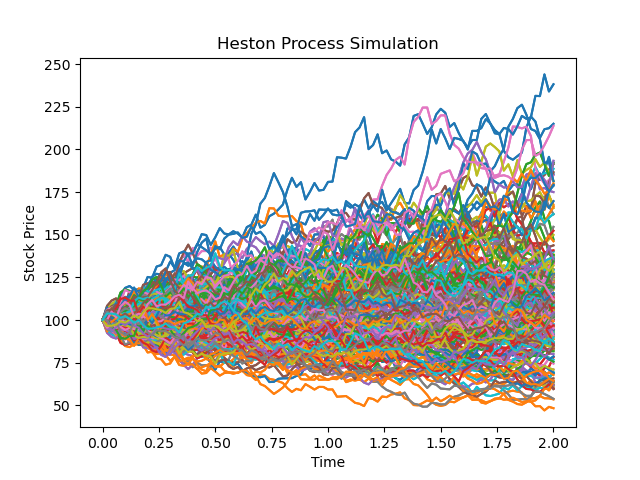

In [5]:
from matplotlib import pyplot as plt
from quantlib.sim.simulate import simulate_process
from quantlib.time_grid import TimeGrid

# simulate and plot Heston paths
paths = 200
steps = 100
horizon = 2
seed = 12345

grid = TimeGrid(horizon, steps)
res = simulate_process(process, paths, grid, seed)

plt.plot(list(grid), res)
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Heston Process Simulation')
plt.show()